<a href="https://colab.research.google.com/github/KatyaKatyaKatyaSSS/DKR-1/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4
## Проверка статистических гипотез

### Задание
1. Изучить теоретический материал (*см. вложенный .pdf файл, стр. 15 - 19*)
2. Найти в открытых источниках, или выдумать выборку непрерывных данных. Можно использовать данные из приложенного *.csv* файла. (Описание данных: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)
3. Реализовать скрипт в Python для загрузки данных (Воспользоваться Лабораторной №3).
4. Выдвинуть гипотезу $H_0$ относительно закона распределения, например, *«выборка извлечена из генеральной совокупности со стандартным нормальным распределением»*.
5. Посчитать и вывести основные числовые характеристики выборки (среднее, дисперсию, стандартное отклонение, медиану).
6. Построить эмпирическую и теоретическую оценки плотности распределения. В примере ниже приведён пример для нормального и асимметричного нормального распределения.
7. Зафиксировать уровень значимости критерия $\alpha$, пользуясь таблицей (см. вложение).
8. Применить критерий $\chi^2$ (можно использовать встроенные функции в Python или Excel) и получить $p-value$. (Пример: https://medstatistic.ru/methods/methods4.html)
9. Сравнить $p-value$ с выбранным уровнем значимости $\alpha$.
10. Отклонить или принять гипотезу $H_0$ в зависимости от знака неравенства $p\lt\alpha$ ($p\gt\alpha$).

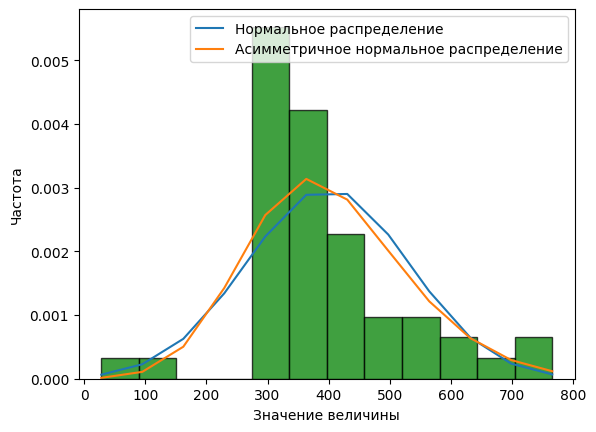

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

m = [328,454,312,625,609,546,502,736,485,766,429,313,328,344,360,453,563,343,375,28,312,361,297,437,328,328,328,297,359,328,361,703,500,344,329,312,328,547,314,328,439,359,126,408,360,346,328,392,453,359]
samples=np.array(m)
mean=np.mean(samples)
var=np.var(samples)
std=np.sqrt(var)

x=np.linspace(min(samples), max(samples),12)
y_pdf=stats.norm.pdf(x,mean,std)
y_skew_pdf=stats.skewnorm.pdf(x,*stats.skewnorm.fit(samples))

l1,=plt.plot(x,y_pdf, label='Нормальное распределение')
l2,=plt.plot(x,y_skew_pdf, label='Асимметричное нормальное распределение')
n,bins,patches=plt.hist(samples,12,density=True,facecolor='g',edgecolor='black', alpha=0.75)
plt.xlabel('Значение величины')
plt.ylabel('Частота')
plt.legend((l1,l2),(l1.get_label(), l2.get_label()), loc='upper right')


**1. Загрузка данных из файла .csv**

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Открывает окно загрузки файла

# Получаем имя загруженного файла
file_name = list(uploaded.keys())[0]

# Читаем данные в DataFrame
df = pd.read_csv(file_name)

# Выводим первые строки
df.head()



Saving StudentsPerformance (1).csv to StudentsPerformance (1).csv


,female,group B,bachelor's degree,standard,none,72,72.1,74
0,female,group C,some college,standard,completed,69,90,88
1,female,group B,master's degree,standard,none,90,95,93
2,male,group A,associate's degree,free/reduced,none,47,57,44
3,male,group C,some college,standard,none,76,78,75
4,female,group B,associate's degree,standard,none,71,83,78


# **2. Выбор переменной для анализа**

In [ ]:
# Проверяем названия колонок
print("Названия колонок:", df.columns)

Названия колонок: Index(['female', 'group B', 'bachelor's degree', 'standard', 'none', '72',
       '72.1', '74'],
      dtype='object')


In [5]:
# Убираем лишние пробелы в заголовках, если есть
df.columns = df.columns.str.strip()

In [6]:
# Выбираем числовые данные
data = df['72']

# **3. Основные статистические характеристики**

In [ ]:
import numpy as np

# Основные характеристики
mean = np.mean(data)  # Среднее
variance = np.var(data, ddof=1)  # Дисперсия
std_dev = np.std(data, ddof=1)  # Стандартное отклонение
median = np.median(data)  # Медиана

print(f'Среднее: {mean:.2f}')
print(f'Дисперсия: {variance:.2f}')
print(f'Стандартное отклонение: {std_dev:.2f}')
print(f'Медиана: {median:.2f}')


Среднее: 66.08
Дисперсия: 230.11
Стандартное отклонение: 15.17
Медиана: 66.00


#**4. Построение эмпирической и теоретической оценки плотности распределения».**

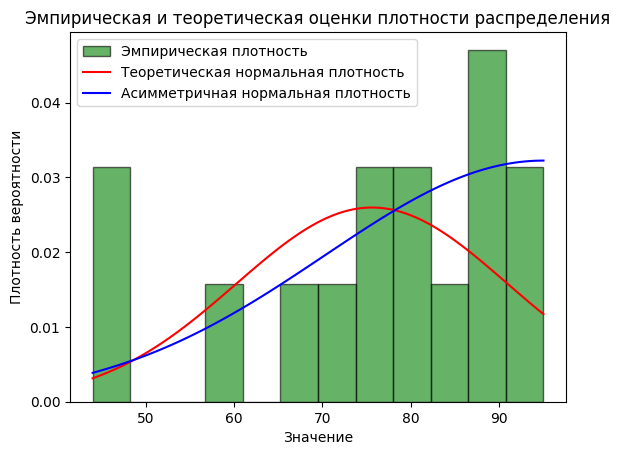

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = np.array([69,	90,	88, 90,	95,	93, 47,	57,	44, 76,	78,	75, 71,	83,	78])

# Вычисляем параметры нормального распределения
mean = np.mean(data)  # Среднее значение
std_dev = np.std(data)  # Стандартное отклонение

# Эмпирическая оценка (гистограмма)
plt.hist(data, bins=12, density=True, alpha=0.6, color='g', edgecolor='black', label="Эмпирическая плотность")

# Теоретическая оценка (нормальное распределение)
x = np.linspace(min(data), max(data), 100)
y_pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, y_pdf, label='Теоретическая нормальная плотность', color='red')

# Теоретическая оценка (асимметричное нормальное распределение)
y_skew_pdf = stats.skewnorm.pdf(x, *stats.skewnorm.fit(data))
plt.plot(x, y_skew_pdf, label="Асимметричная нормальная плотность", color='blue')

# Подписи и легенда
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title("Эмпирическая и теоретическая оценки плотности распределения")

# Отображение графика
plt.show()


# **5. Проверка гипотезы с помощью критерия χ^2**

In [11]:
from scipy.stats import chi2, norm
import numpy as np

# Гистограмма
observed_freq, bin_edges = np.histogram(data, bins=10)

# Ожидаемые частоты для нормального распределения
expected_freq = len(data) * np.diff(norm.cdf(bin_edges, mean, std_dev))

# Вычисляем статистику χ²
chi2_stat = sum((observed_freq - expected_freq) ** 2 / expected_freq)

# Степени свободы (кроме двух параметров нормального распределения)
df_chi2 = len(observed_freq) - 1 - 2

# Находим p-value
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

# Выводим результаты
print(f"Статистика χ²: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Статистика χ²: 21.26
p-value: 0.0034


# **6. Сравнение с критическим значением**

In [13]:
# Уровень значимости
alpha = 0.05

# Проверяем гипотезу
if p_value < alpha:
    print(f"Отклоняем H0: p-value ({p_value:.4f}) < alpha ({alpha}).")
    print("Данные НЕ соответствуют нормальному распределению.")
else:
    print(f"Не отвергаем H0: p-value ({p_value:.4f}) ≥ alpha ({alpha}).")
    print("Нет оснований отвергать гипотезу о нормальном распределении данных.")


Отклоняем H0: p-value (0.0034) < alpha (0.05).
Данные НЕ соответствуют нормальному распределению.


# **7. Итоговое заключение**
Если p-значение < α, гипотеза H0 отвергается, в противном случае принимается.

# **Вывод**
*  Если p-значение больше 0,05, то данных недостаточно для отклонения гипотезы.
*  Если p-значение меньше 0,05, то выборка не подчиняется нормальному распределению.
